In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
type(df)


pandas.core.frame.DataFrame

In [6]:
dataframe_row_count, dataframe_column_count = df.shape
print('Row Count:', dataframe_row_count)
print('Column Count:', dataframe_column_count)

Row Count: 5110
Column Count: 12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
other = df[df['gender'] == 'Other'].index
df.drop(other, axis=0, inplace= True)
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [12]:
df.work_type = np.where(df['work_type'] == 'children','Never_worked',df.work_type)
df.work_type.value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [13]:
conditions= [(df['age'] <= 14), (df['age'] >= 15) & (df['age'] <= 24), (df['age'] >= 25) & (df['age'] <= 54), (df['age'] >= 55) & (df['age'] <= 64), (df['age'] >= 65) ]
values= ['Children','Early working age','Prime working age','Mature working age','Elderly']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Number of numerical variables: ',len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


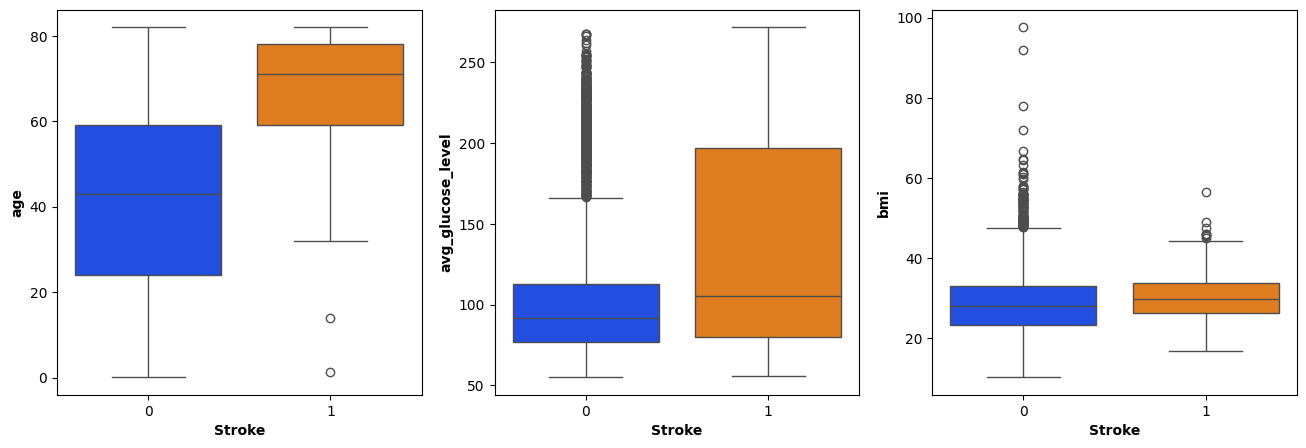

In [15]:
df_num = ['age', 'avg_glucose_level', 'bmi']
fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()
for i, col_name in enumerate(df_num):
  sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i], palette = 'bright')
  axs[i].set_xlabel("Stroke", weight = 'bold')
  axs[i].set_ylabel(f"{col_name}", weight='bold')

In [16]:

bmi_outliers=df.loc[df['bmi'] < 12]
bmi_outliers['bmi'].shape

(3,)

In [17]:
bmi_outliers=df.loc[df['bmi'] > 50]
bmi_outliers['bmi'].shape

(79,)

In [18]:
df.drop(df.index[df['bmi'] > 50], inplace = True)
df.drop(df.index[df['bmi'] < 12], inplace = True)
# drop outliers

In [19]:
discrete_features= [feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete variables count: {}".format(len(discrete_features)))

df[discrete_features].head()

Discrete variables count: 3


,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


In [20]:
continuous_features= [feature for feature in numerical_features if feature not in discrete_features ]
print("Continuous variables count: {}".format(len(continuous_features)))

df[continuous_features].head()

Continuous variables count: 4


,id,age,avg_glucose_level,bmi
0,9046,67.0,228.69,36.6
1,51676,61.0,202.21,NaN
2,31112,80.0,105.92,32.5
3,60182,49.0,171.23,34.4
4,1665,79.0,174.12,24.0


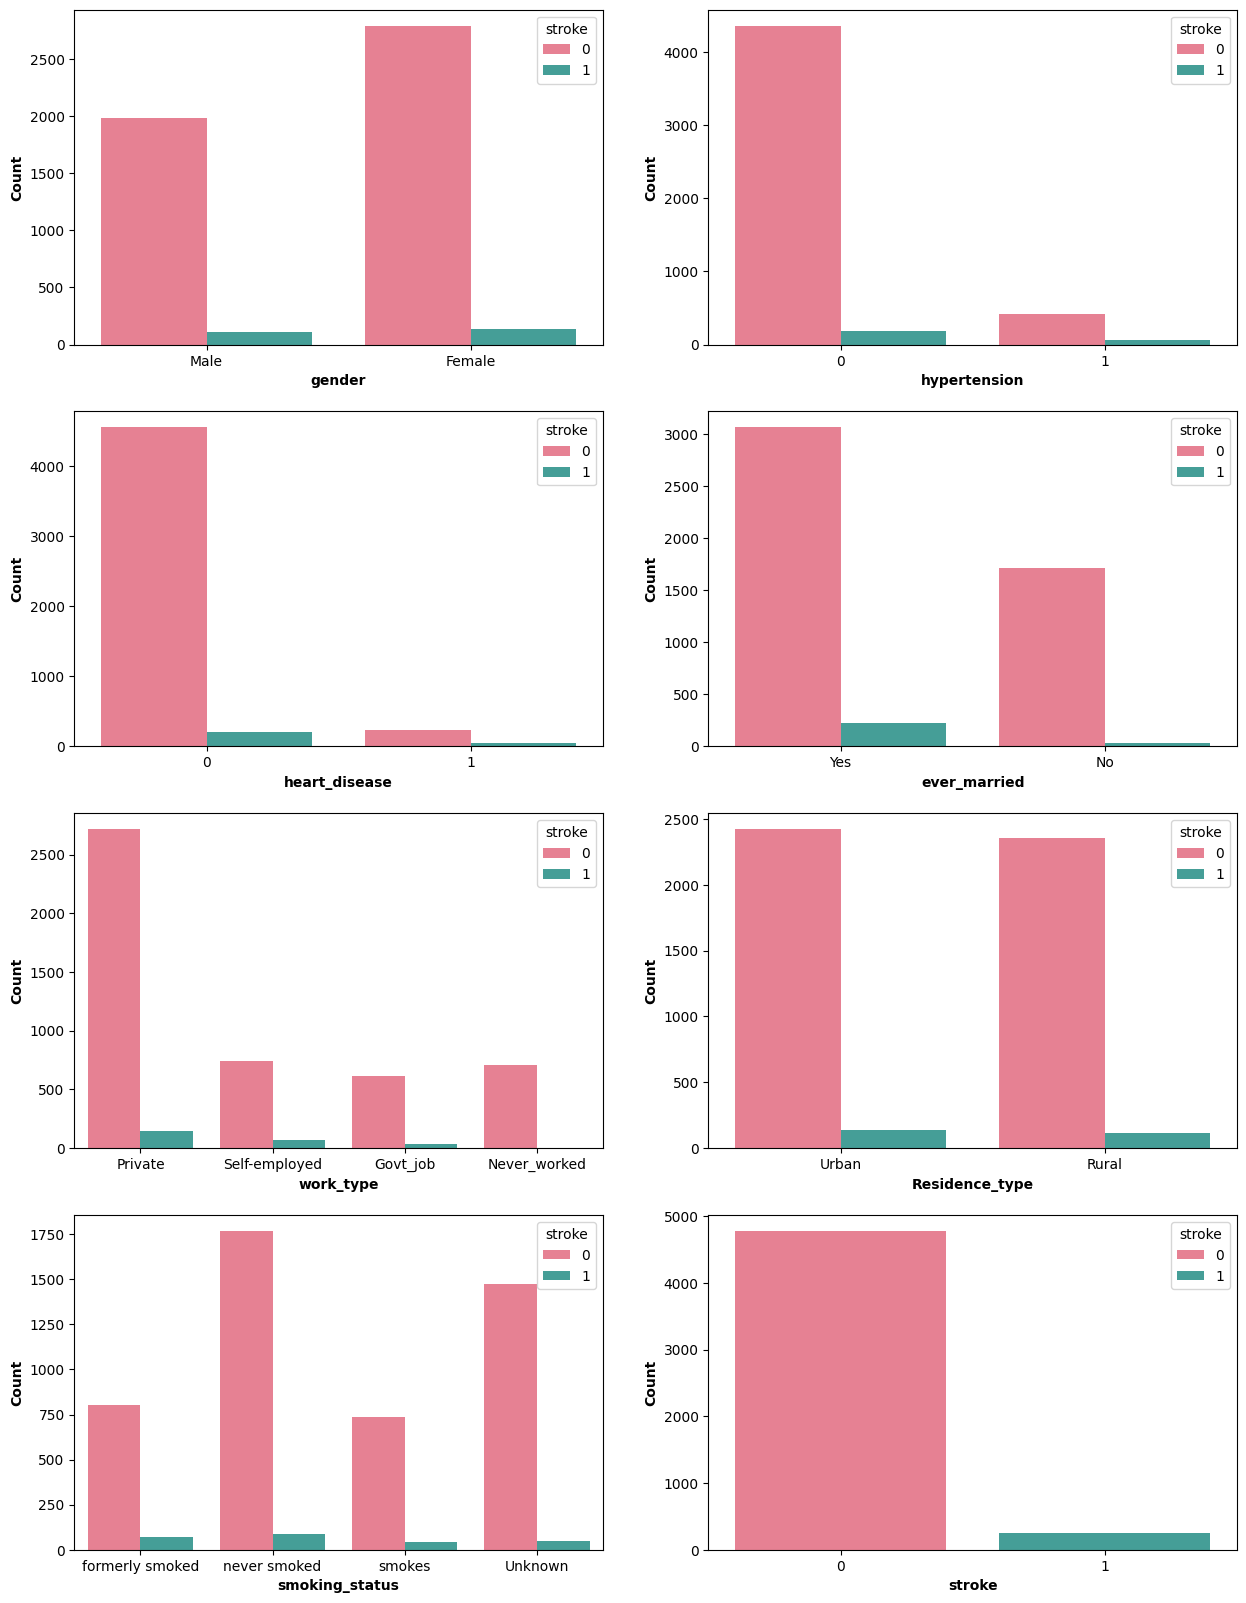

In [21]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(15,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = 'husl')
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

In [22]:
df.isna().any()


id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [23]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean().round(4))

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5027.0,36603.869107,21121.055580,67.00,17864.50,37029.00,54736.500,72940.00
age,5027.0,43.192910,22.723715,0.08,25.00,45.00,61.000,82.00
hypertension,5027.0,0.095683,0.294186,0.00,0.00,0.00,0.000,1.00
heart_disease,5027.0,0.054705,0.227425,0.00,0.00,0.00,0.000,1.00
avg_glucose_level,5027.0,105.899453,44.995000,55.12,77.25,91.85,113.865,271.74
bmi,5027.0,28.456653,6.859065,12.00,23.70,28.30,32.500,49.90
stroke,5027.0,0.049334,0.216585,0.00,0.00,0.00,0.000,1.00


In [26]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.005827,0.003834,-0.002981,0.008180,0.018594,0.005342
age,0.005827,1.000000,0.279094,0.265262,0.236734,0.364506,0.246906
hypertension,0.003834,0.279094,1.000000,0.112075,0.170430,0.148636,0.131997
heart_disease,-0.002981,0.265262,0.112075,1.000000,0.166569,0.054296,0.135048
avg_glucose_level,0.008180,0.236734,0.170430,0.166569,1.000000,0.173446,0.133045
bmi,0.018594,0.364506,0.148636,0.054296,0.173446,1.000000,0.052624
stroke,0.005342,0.246906,0.131997,0.135048,0.133045,0.052624,1.000000


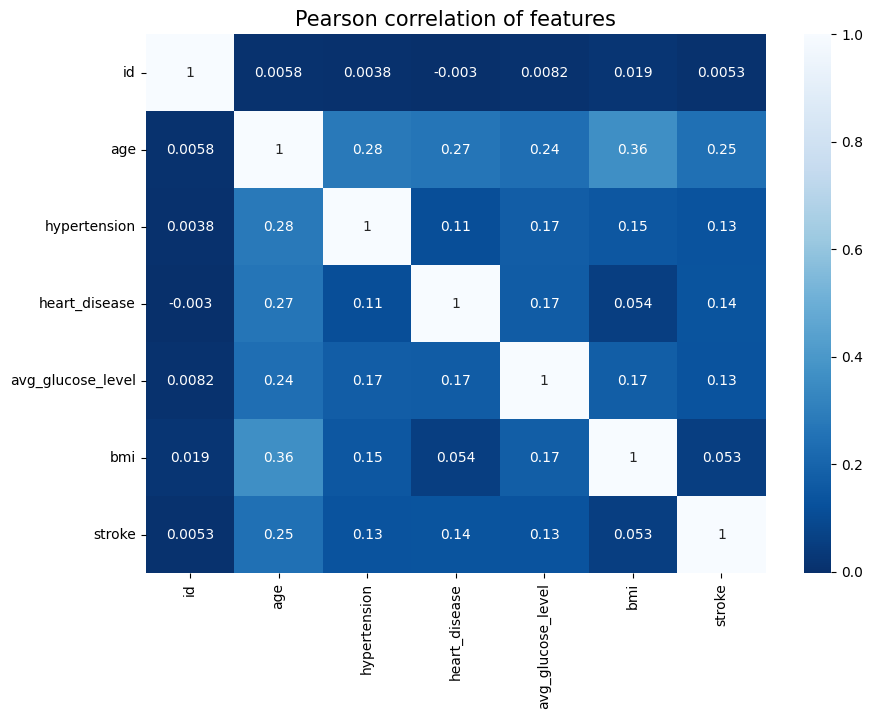

In [27]:

plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),annot=True,cmap='Blues_r')
plt.title('Pearson correlation of features',size=15)

plt.show()

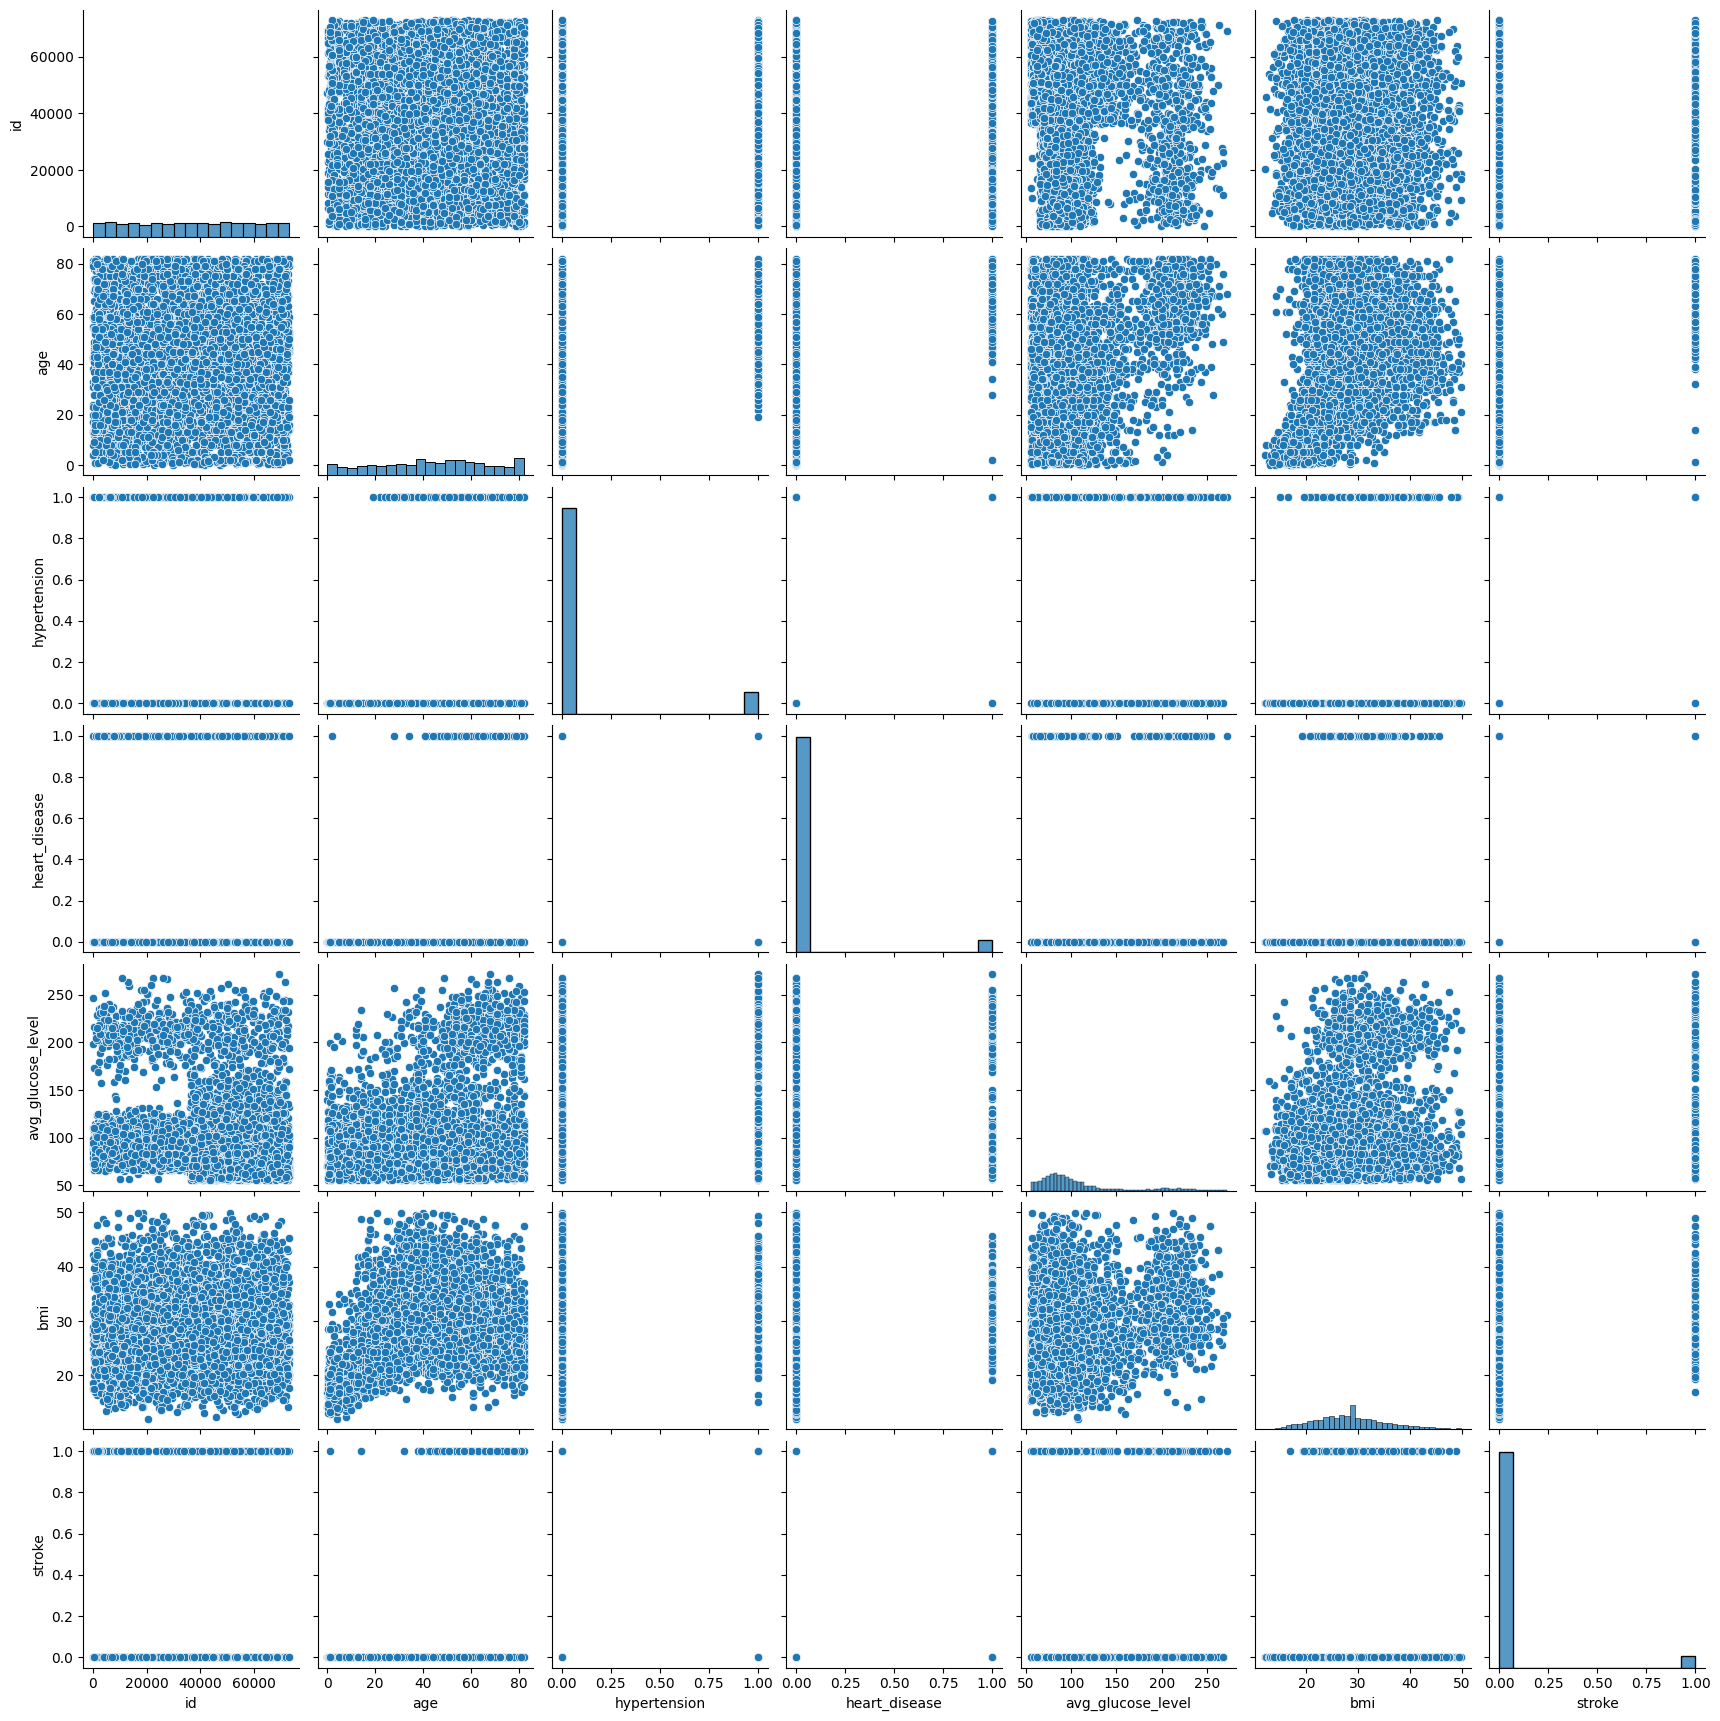

In [28]:
g = sns.pairplot(df)

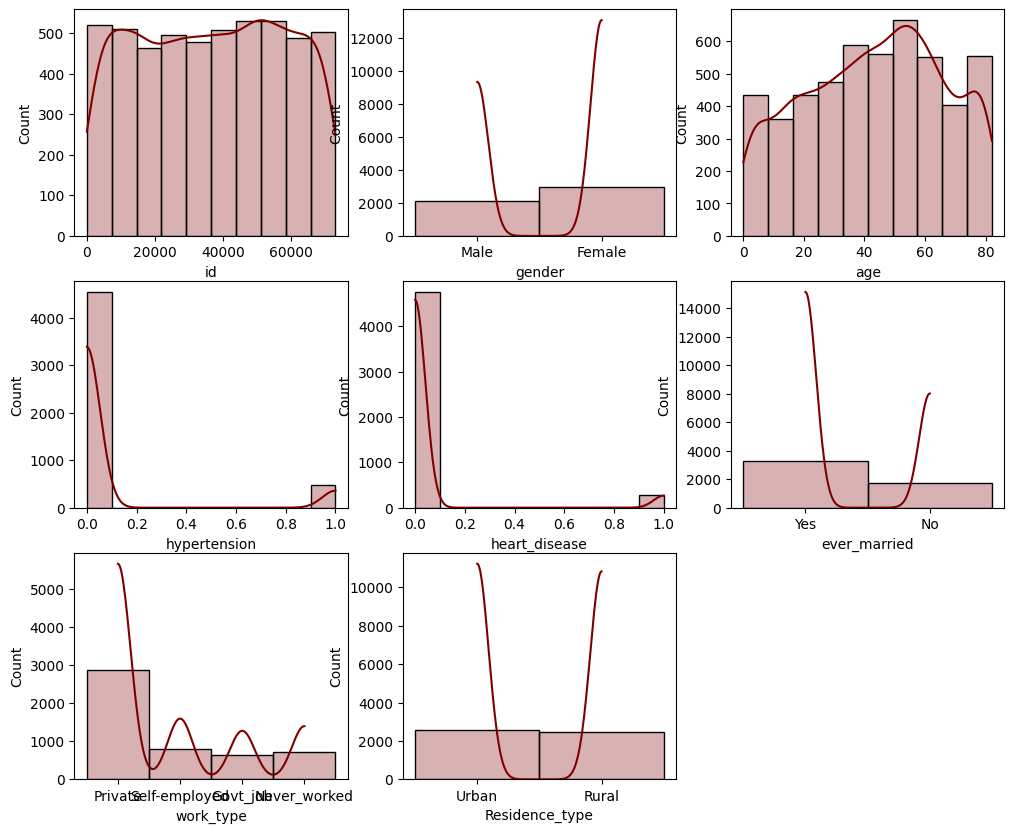

In [29]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:8]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],kde=True,alpha=0.3, bins=10, color='maroon',common_norm=False)


<Axes: xlabel='age', ylabel='value'>

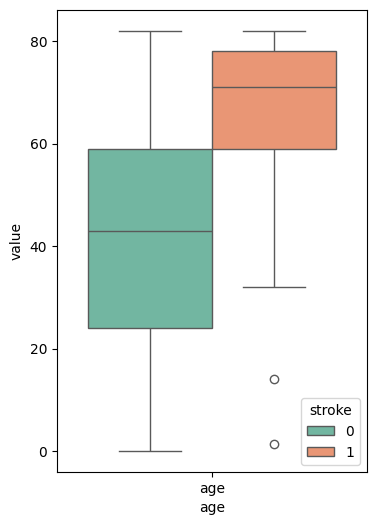

In [30]:
fig,ax = plt.subplots(figsize = (4,6))
#Create dataset that shows each age value and its corresponding stroke state
age_data= pd.concat([df['age'], df['stroke']], axis=1)

#Create dataset for the plot
age_plot= pd.melt(age_data, id_vars= 'stroke', var_name= 'age')

#Create the plot
sns.boxplot(x= 'age', y= 'value', hue= 'stroke', data= age_plot, palette="Set2")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
0,9046,1,67.0,0,1,Yes,2,1,228.69,36.6000,1,1
1,51676,0,61.0,0,0,Yes,3,0,202.21,28.4567,1,2
2,31112,1,80.0,0,1,Yes,2,0,105.92,32.5000,1,2
3,60182,0,49.0,0,0,Yes,2,1,171.23,34.4000,1,3
4,1665,0,79.0,1,0,Yes,3,0,174.12,24.0000,1,2


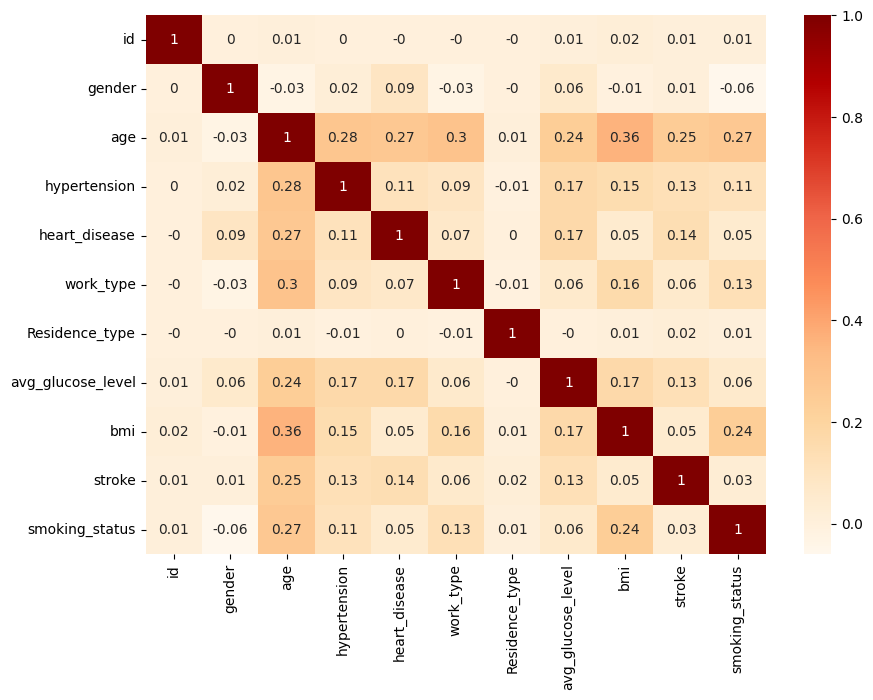

In [31]:
# Cleaning Dataset

# Step 1 - Deletes 'id' column
#df = df.drop(columns = ['id'], axis = 1)

# Step 2 - Shift age_category to display before 'stroke' column
cols = list(df.columns)
df = df[cols[0:10] + [cols[-1]] + [cols[10]] ] # Swaps age_category and stroke position
df.head()

# Step 3
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
# df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df_en = df
df_en.head()

# Step 4
corr = df_en.corr().round(2)
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

# Step 5
# df_en = df.drop(columns = ['ever_married'], axis = 1) # drops ever_married column
df_en.head()

In [32]:
df['stroke'].value_counts()

0    4779
1     248
Name: stroke, dtype: int64

In [33]:
df= df.drop(columns=['id'], axis=1)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
0,1,67.0,0,1,Yes,2,1,228.69,36.6000,1,1
1,0,61.0,0,0,Yes,3,0,202.21,28.4567,1,2
2,1,80.0,0,1,Yes,2,0,105.92,32.5000,1,2
3,0,49.0,0,0,Yes,2,1,171.23,34.4000,1,3
4,0,79.0,1,0,Yes,3,0,174.12,24.0000,1,2


In [34]:
df.shape

(5027, 11)

In [35]:
cols = list(df.columns)
df = df[cols[0:10] + [cols[-1]]+ [cols[10]] ]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status,smoking_status
0,1,67.0,0,1,Yes,2,1,228.69,36.6000,1,1,1
1,0,61.0,0,0,Yes,3,0,202.21,28.4567,1,2,2
2,1,80.0,0,1,Yes,2,0,105.92,32.5000,1,2,2
3,0,49.0,0,0,Yes,2,1,171.23,34.4000,1,3,3
4,0,79.0,1,0,Yes,3,0,174.12,24.0000,1,2,2


In [36]:
conditions= [(df['age'] <= 14),
                 (df['age'] >= 15) & (df['age'] <= 24),
                 (df['age'] >= 25) & (df['age'] <= 54),
                 (df['age'] >= 55) & (df['age'] <= 64),
                 (df['age'] >= 65)
]

values= ['Children','Early working age','Prime working age','Mature working age','Elderly']

#Create the new column
df['Age_Category']= np.select(conditions,values)

#Now we check if the new column is added
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status,smoking_status,Age_Category
0,1,67.0,0,1,Yes,2,1,228.69,36.6000,1,1,1,Elderly
1,0,61.0,0,0,Yes,3,0,202.21,28.4567,1,2,2,Mature working age
2,1,80.0,0,1,Yes,2,0,105.92,32.5000,1,2,2,Elderly
3,0,49.0,0,0,Yes,2,1,171.23,34.4000,1,3,3,Prime working age
4,0,79.0,1,0,Yes,3,0,174.12,24.0000,1,2,2,Elderly


In [38]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled, columns=columns)
df_en = df_en.drop(columns=columns, axis=1)
stand_scaled.head()
df = pd.concat([df_en, stand_scaled], axis=1)

df_en.head()

df = df.fillna(df.mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 4952
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   stroke             5110 non-null   float64
 8   smoking_status     5110 non-null   float64
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                5110 non-null   float64
 11  age                5110 non-null   float64
dtypes: float64(11), object(1)
memory usage: 519.0+ KB


<Axes: >

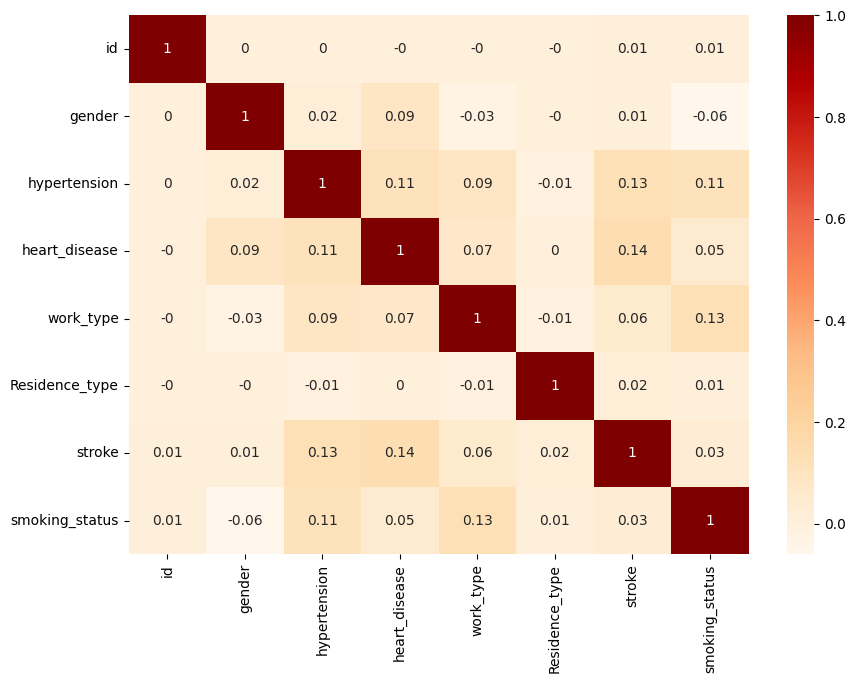

In [39]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

In [40]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head()

,id,gender,hypertension,heart_disease,work_type,Residence_type,stroke,smoking_status
0,9046,1,0,1,2,1,1,1
1,51676,0,0,0,3,0,1,2
2,31112,1,0,1,2,0,1,2
3,60182,0,0,0,2,1,1,3
4,1665,0,1,0,3,0,1,2


In [43]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
# stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

# df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.729253,1.187357,1.047780
1,2.140685,0.000007,0.783713
2,0.000457,0.589548,1.619927
3,1.452096,0.866581,0.255577
4,1.516331,-0.649811,1.575915


In [44]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head()

,id,gender,hypertension,heart_disease,work_type,Residence_type,stroke,smoking_status,avg_glucose_level,bmi,age
0,9046.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,2.729253,1.187357,1.047780
1,51676.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,2.140685,0.000007,0.783713
2,31112.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.000457,0.589548,1.619927
3,60182.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,1.452096,0.866581,0.255577
4,1665.0,0.0,1.0,0.0,3.0,0.0,1.0,2.0,1.516331,-0.649811,1.575915


In [45]:
df.isnull().sum()

id                   83
gender               83
hypertension         83
heart_disease        83
work_type            83
Residence_type       83
stroke               83
smoking_status       83
avg_glucose_level    83
bmi                  83
age                  83
dtype: int64

In [46]:
df = df.fillna(df.mode().iloc[0])

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 4952
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   work_type          5110 non-null   float64
 5   Residence_type     5110 non-null   float64
 6   stroke             5110 non-null   float64
 7   smoking_status     5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  age                5110 non-null   float64
dtypes: float64(11)
memory usage: 479.1 KB


In [48]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
# Split Raw Data Into Different Sections

x = df.drop('stroke', axis = 1)
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, random_state=2022, stratify=y, shuffle=True)

# Shape, Train Data
x_train.shape

x_test.shape

# y_train.value_counts(normalize=True)


# Train ML Model

models = dict() # Empty dictionary
models['Logreg'] = LogisticRegression() # Creates instance of logisitic regression model

models['Random Forest'] = RandomForestClassifier(n_estimators = 250, random_state = 2022)

for model in models:
  models[model].fit(x_train, y_train)
  print(model + " model fitting completed.")

# Evaluate ML Model
for x in models:
  model = models[x]
  y_pred = model.predict(x_test)
  arg_test = {'y_true':y_test, 'y_pred':y_pred}
  print("\nClassification report: -\n",classification_report(**arg_test))

# Accuracy Score
print('Summary of Accuracy Score: -\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))



Logreg model fitting completed.
Random Forest model fitting completed.

Classification report: -
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1459
         1.0       0.33      0.01      0.03        74

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533


Classification report: -
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1459
         1.0       0.55      0.08      0.14        74

    accuracy                           0.95      1533
   macro avg       0.75      0.54      0.56      1533
weighted avg       0.94      0.95      0.94      1533

Summary of Accuracy Score: -

Logreg Model:  0.9511
Random Forest Model:  0.9524


In [50]:
x=df.drop('stroke',axis=1)
x

,id,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age
0,9046.0,1.0,0.0,1.0,2.0,1.0,1.0,2.729253,1.187357,1.047780
1,51676.0,0.0,0.0,0.0,3.0,0.0,2.0,2.140685,0.000007,0.783713
2,31112.0,1.0,0.0,1.0,2.0,0.0,2.0,0.000457,0.589548,1.619927
3,60182.0,0.0,0.0,0.0,2.0,1.0,3.0,1.452096,0.866581,0.255577
4,1665.0,0.0,1.0,0.0,3.0,0.0,2.0,1.516331,-0.649811,1.575915
...,...,...,...,...,...,...,...,...,...,...
4650,67.0,0.0,0.0,0.0,2.0,1.0,2.0,-0.845277,-0.518585,-1.152783
4779,67.0,0.0,0.0,0.0,2.0,1.0,2.0,0.076250,-1.495491,-1.853443
4838,67.0,0.0,0.0,0.0,2.0,1.0,2.0,-0.833941,0.779097,1.399870
4906,67.0,0.0,0.0,0.0,2.0,1.0,2.0,0.380981,-1.830847,-1.416851


In [51]:
y=df['stroke']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4650    0.0
4779    0.0
4838    0.0
4906    0.0
4952    0.0
Name: stroke, Length: 5110, dtype: float64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3,
                                                    random_state=2022, stratify=y, shuffle=True)

In [53]:
print(x_train.shape)
print(x_test.shape)

(3577, 10)
(1533, 10)


In [54]:
models = dict()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier(n_estimators = 250, random_state = 2022)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['Naive Bayes'] = BernoulliNB()
models['AdaBoost'] = AdaBoostClassifier(learning_rate = 0.08, n_estimators = 250, random_state = 2022)


In [56]:
#y_train = y_train.iloc[:, 0].values
#y_train = y_train.flatten()

# Now fit the models in the loop with the flattened y_train
for model_name, model in models.items():
    model.fit(x_train, y_train)

In [57]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print("Confusion matrix: -\n",confusion_matrix(**arg_test))

Test Set Prediction:

--------------------Logreg--------------------
Confusion matrix: -
 [[1457    2]
 [  73    1]]
--------------------Random Forest--------------------
Confusion matrix: -
 [[1454    5]
 [  68    6]]
--------------------Support Vector Machine--------------------
Confusion matrix: -
 [[1437   22]
 [  72    2]]
--------------------Naive Bayes--------------------
Confusion matrix: -
 [[1454    5]
 [  73    1]]
--------------------AdaBoost--------------------
Confusion matrix: -
 [[1458    1]
 [  70    4]]


In [58]:
for x in models:
    print('-'*20+x+'-'*20)
    print("\nClassification report: -\n",classification_report(**arg_test))


--------------------Logreg--------------------

Classification report: -
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1459
         1.0       0.80      0.05      0.10        74

    accuracy                           0.95      1533
   macro avg       0.88      0.53      0.54      1533
weighted avg       0.95      0.95      0.93      1533

--------------------Random Forest--------------------

Classification report: -
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1459
         1.0       0.80      0.05      0.10        74

    accuracy                           0.95      1533
   macro avg       0.88      0.53      0.54      1533
weighted avg       0.95      0.95      0.93      1533

--------------------Support Vector Machine--------------------

Classification report: -
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98   

In [59]:
print('Summary of Accuracy Score: -\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))



Summary of Accuracy Score: -

Logreg Model:  0.9511
Random Forest Model:  0.9524
Support Vector Machine Model:  0.9387
Naive Bayes Model:  0.9491
AdaBoost Model:  0.9537


In [60]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(x_train, y_train)

classifier.score(x_test, y_test)

0.9504240052185258

In [61]:
classifier.predict(x_test)

df.columns

pred = classifier.predict(x_test)

pred



array([0, 0, 0, ..., 0, 0, 0])

In [62]:
if pred[0] == 0:
  print('A patient is not likely to get stroked')
else:
  print('A patient is likely to get stroked')

A patient is not likely to get stroked
